<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

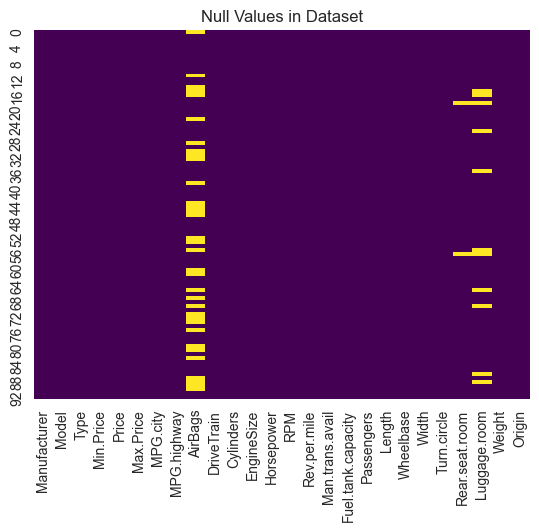

In [2]:
import pandas as pd

car_data = pd.read_csv('../datasets/Cars93.csv')
car_data.info()

num_car = int(len(car_data['Price']))
print(num_car)

# number of rows
car_data.describe()

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize null values using a heatmap
sns.heatmap(car_data.isnull(), cbar=False, cmap='viridis')
plt.title("Null Values in Dataset")
plt.show()


In [3]:
car_data[car_data.isna()]['Rear.seat.room']
pd.crosstab(columns=[car_data['AirBags'], car_data['Rear.seat.room']])


#
# car_data['Rear.seat.room'].describe()

# calculate mean for each group
# def calculate_mean_group(df):




TypeError: crosstab() missing 1 required positional argument: 'index'

In [5]:
car_data_numeric = car_data.select_dtypes(include=['float64', 'int64'])
car_data_corr = car_data.corr()
sns.heatmap(car_data_corr,  cbar=False, cmap='viridis')

ValueError: could not convert string to float: 'Acura'

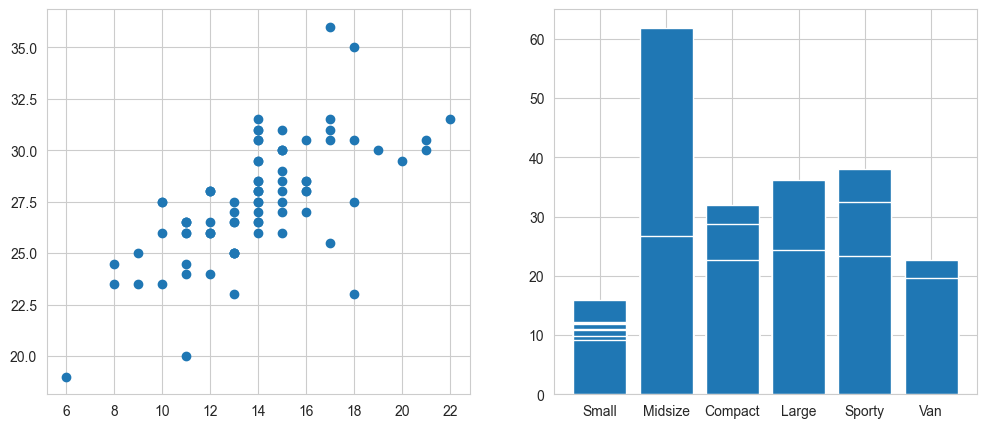

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# car_data.hist(bins=30, figsize=(20, 18))
# plt.show()

import matplotlib.pyplot as plt

# plt.boxplot(car_data['MPG.city'])
# sns.pairplot(car_data.select_dtypes(exclude=['object']), hue='Price', height=6)
# for column in car_data.select_dtypes(exclude=['object']).columns:
#     plt.subplots(1,2, figsize = (10,5))
#     plt.show()

type_refine = car_data.dropna(subset=['Type', 'Price'])
# price_refine = car_data.dropna(subset=['Price'], inplace=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(car_data['Luggage.room'], car_data['Rear.seat.room'])
ax2.bar(type_refine['Type'], type_refine['Price'])
# ax2.boxplot(car_data['EngineSize'])
plt.show()

type_refine.isna().sum()

<Axes: xlabel='Type', ylabel='Price'>

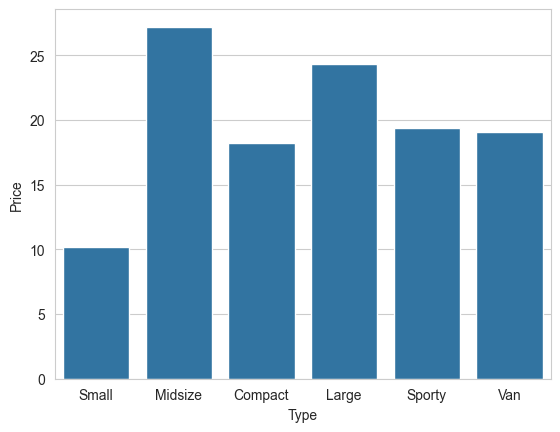

In [57]:
sns.barplot(x=car_data['Type'], y=car_data['Price'], errorbar=None)

In [58]:
car_data.groupby(by=car_data['Type']).agg({'Price': ['mean', 'sum']})

Price       
              mean    sum
Type                     
Compact  18.212500  291.4
Large    24.300000  267.3
Midsize  27.218182  598.8
Small    10.166667  213.5
Sporty   19.392857  271.5
Van      19.100000  171.9

In [10]:
# Check for null/NaN values
null_values = car_data.isnull()

# Count the number of null/NaN values in each column
null_counts = car_data.isnull().sum()

# Display the results
print("Null values in the dataset:")
print(null_values)
print("\nCount of null values per column:")
print(null_counts)

Null values in the dataset:
    Manufacturer  Model   Type  Min.Price  Price  Max.Price  MPG.city  \
0          False  False  False      False  False      False     False   
1          False  False  False      False  False      False     False   
2          False  False  False      False  False      False     False   
3          False  False  False      False  False      False     False   
4          False  False  False      False  False      False     False   
..           ...    ...    ...        ...    ...        ...       ...   
88         False  False  False      False  False      False     False   
89         False  False  False      False  False      False     False   
90         False  False  False      False  False      False     False   
91         False  False  False      False  False      False     False   
92         False  False  False      False  False      False     False   

    MPG.highway  AirBags  DriveTrain  ...  Fuel.tank.capacity  Passengers  \
0         False   

In [11]:
# Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).



Handling missing values in column: AirBags
Imputing with mode: Driver only
Handling missing values in column: Rear.seat.room
Imputing with mean: 27.82967032967033
Handling missing values in column: Luggage.room
Imputing with mean: 13.890243902439025
No missing values remaining in the DataFrame.


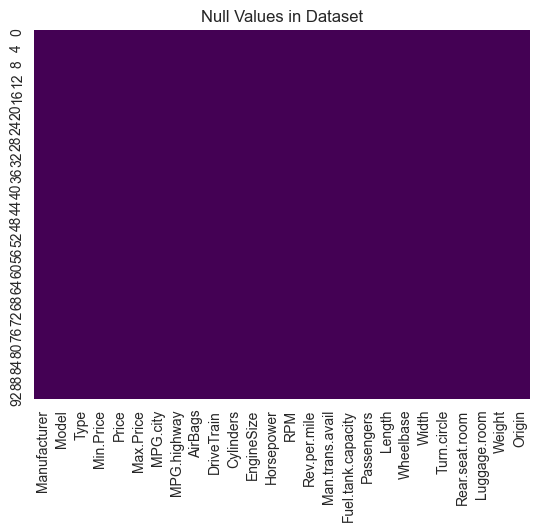

In [12]:
# Write a function to reduce noise (any error in the feature) in individual attributes.
def handle_missing_values(df):
    """
    Handles missing values in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with missing values handled.  The strategy depends on the column type.
    """

    df = df.copy()  # To avoid modifying the original DataFrame

    for col in df.columns:
        if df[col].isnull().any():  # Check if there are any missing values in the column
            print(f"Handling missing values in column: {col}")

            if pd.api.types.is_numeric_dtype(df[col]):
                # Impute missing numerical values with the mean
                mean_value = df[col].mean()
                print(f"Imputing with mean: {mean_value}")
                df[col] = df[col].fillna(mean_value)  # Correct assignment

            else:
                # Impute missing non-numerical values with the most frequent value (mode)
                mode_value = df[col].mode()[0]  # Get the first mode
                print(f"Imputing with mode: {mode_value}")
                df[col] = df[col].fillna(mode_value)  # Correct assignment

    # Verify that there are no remaining missing values
    if df.isnull().any().any():
        print("Warning: Missing values still present after handling.")
    else:
        print("No missing values remaining in the DataFrame.")

    return df


car_data_copy = handle_missing_values(car_data)

# Visualize null values using a heatmap
sns.heatmap(car_data_copy.isnull(), cbar=False, cmap='viridis')
plt.title("Null Values in Dataset")
plt.show()

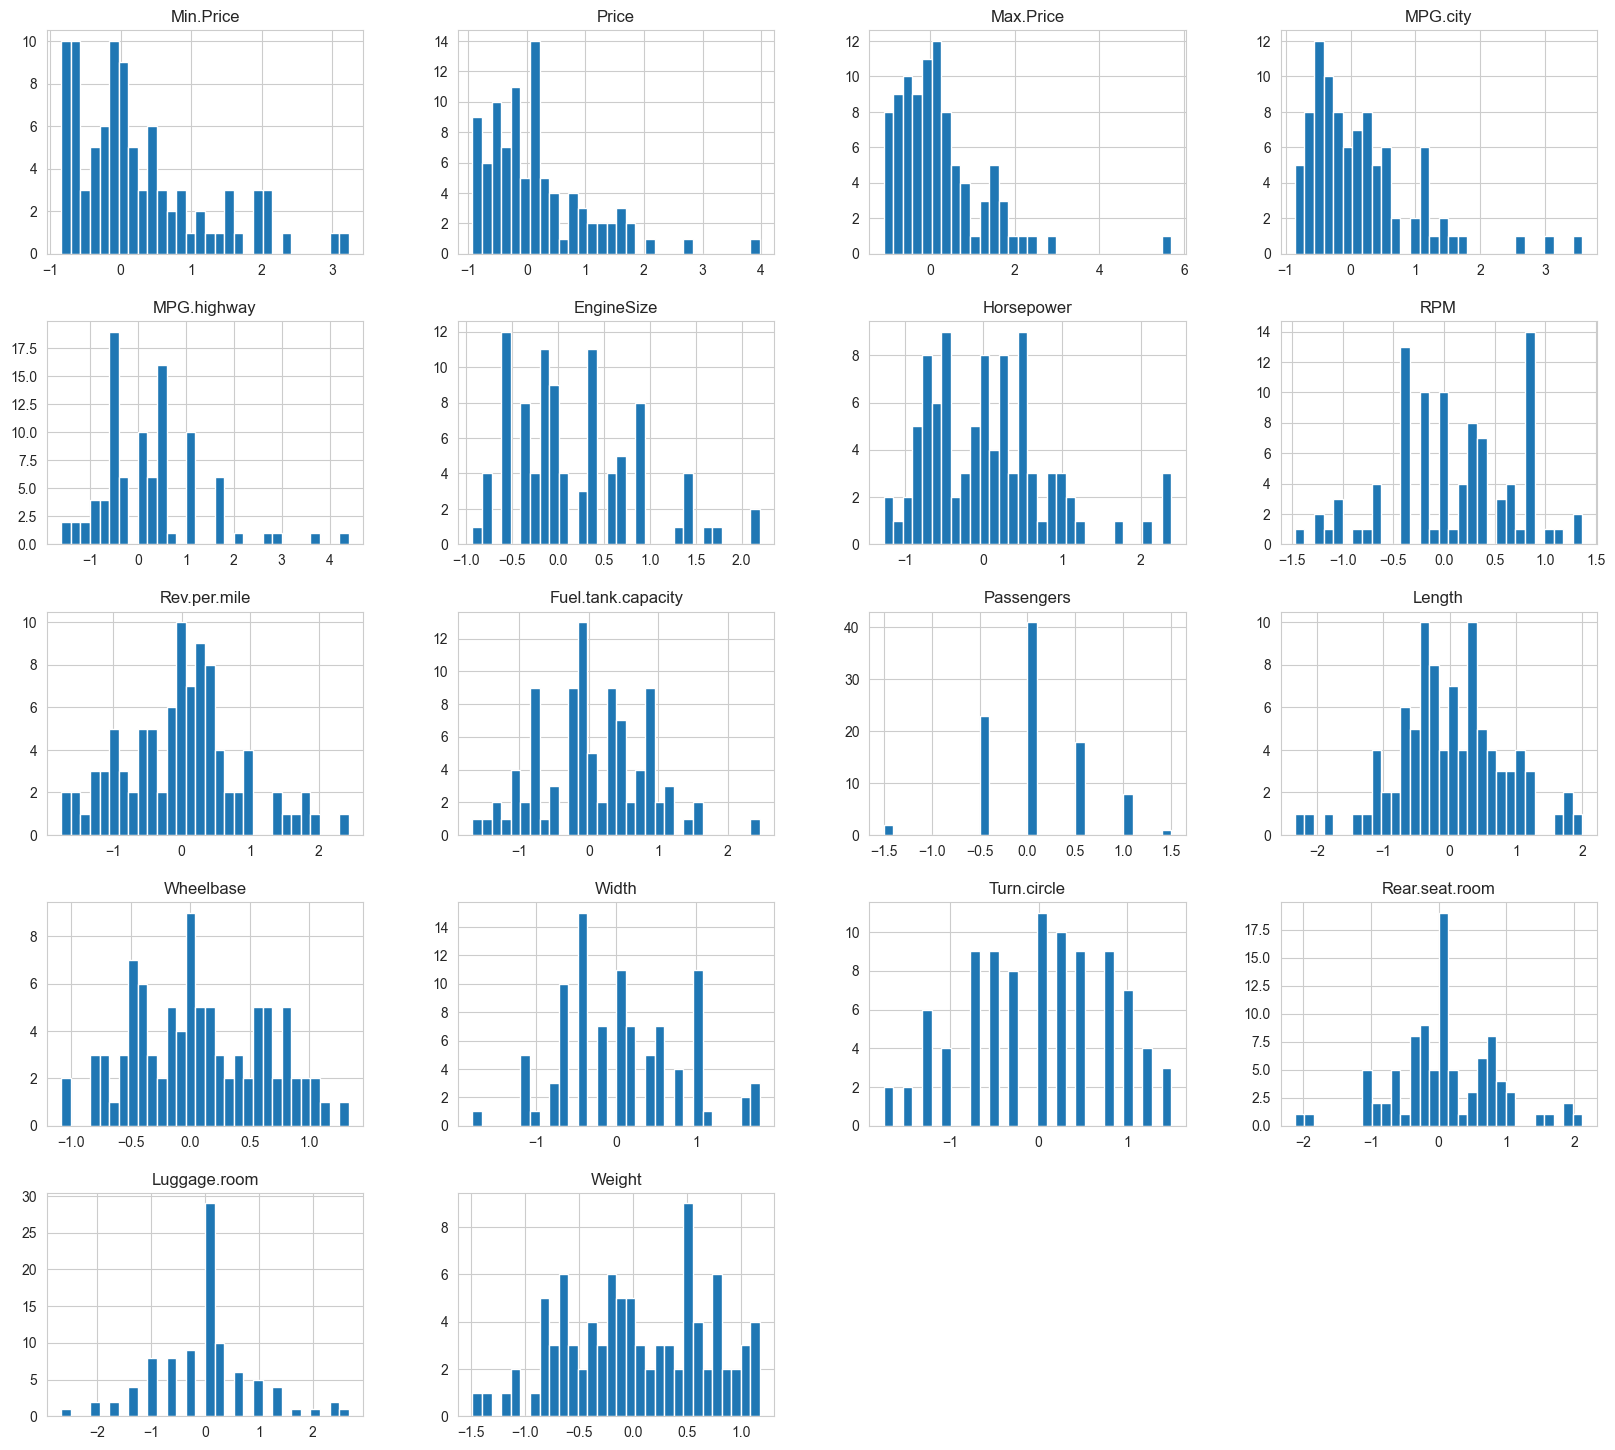

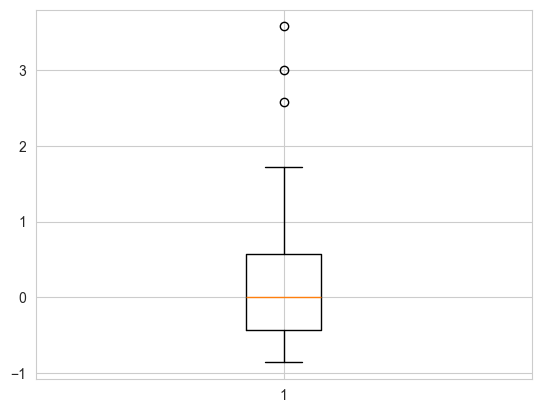

In [30]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np


def reduce_noise_sklearn(df):
    """
    Reduces noise in individual attributes using scikit-learn methods.

    - Uses median imputation for missing values.
    - Applies RobustScaler to handle outliers.

    Parameters:
        df (pd.DataFrame): The dataset with numerical attributes.

    Returns:
        pd.DataFrame: A cleaned DataFrame with reduced noise.
    """
    df_cleaned = df.copy()

    # Select only numerical columns
    num_cols = df_cleaned.select_dtypes(include=[np.number]).columns

    # Handle missing values using median imputation
    imputer = SimpleImputer(strategy="median")
    df_cleaned[num_cols] = imputer.fit_transform(df_cleaned[num_cols])

    # Apply RobustScaler to reduce the effect of outliers
    scaler = RobustScaler()
    df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

    return df_cleaned


car_data_copy = reduce_noise_sklearn(car_data)
import matplotlib.pyplot as plt

car_data_copy.hist(bins=30, figsize=(20, 18))
plt.show()

import matplotlib.pyplot as plt

plt.boxplot(car_data_copy['MPG.city'])
# plt.boxplot(car_data_copy['Turn.circle'])
plt.show()



Removing Outliers

In [34]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    """
    determining threshold for the outliers in
    :param th3: 75th quantile
    :param th1: 25th quantile
    :param dataframe: car dataframe
    :param col_name: column name which is used to determine outliers
    :return: lower and upper bound
    """
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit


lower_limit, upper_limit = determine_outlier_thresholds_iqr(car_data, 'MPG.city')
print(lower_limit, upper_limit)

7.5 35.5


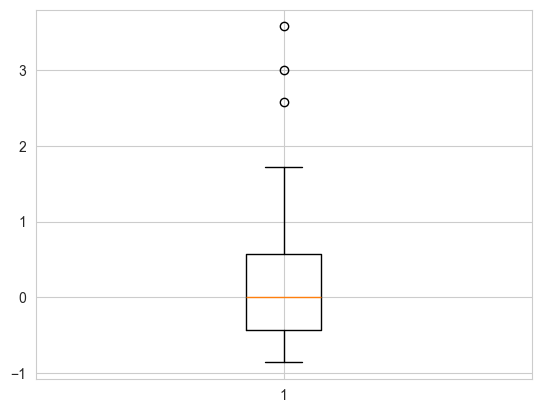

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(car_data_copy['MPG.city'])
# plt.boxplot(car_data_copy['Turn.circle'])
plt.show()